# Finding Heavy Traffic Indicators on I-94
We're going to analyze a dataset about the westbound traffic on the I-94 Interstate highway.

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
traffic=pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
traffic.info()
traffic.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


# Analyzing Traffic Volume


count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

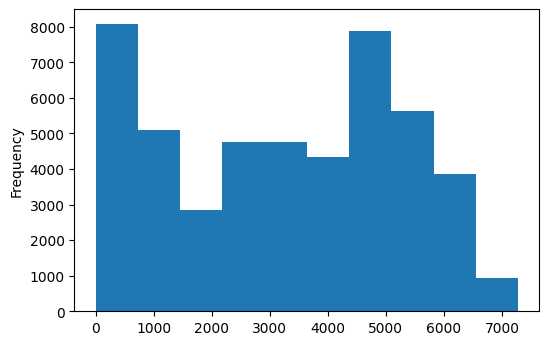

In [2]:
traffic['traffic_volume'].plot.hist()
traffic['traffic_volume'].describe()

Between 2012-10-02 09:00:00 and 2018-09-30 23:00:00, the hourly traffic volume varied from 0 to 7,280 cars, with an average of 3,260 cars.

About 25% of the time, there were only 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction. However, about 25% of the time, the traffic volume was four times as much (4,933 cars or more).

# Traffic Volume: Day vs. Night
Dividing the dataset into two parts:

Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)

Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

In [3]:
traffic['date_time']=pd.to_datetime(traffic['date_time'])
day=traffic.copy()[(traffic['date_time'].dt.hour>=7) & (traffic['date_time'].dt.hour<19)]
print(day.shape)
night=traffic.copy()[(traffic['date_time'].dt.hour>=19) | (traffic['date_time'].dt.hour<7)]
print(night.shape)

(23877, 9)
(24327, 9)


Now we're going to compare the traffic volume at night and during day.

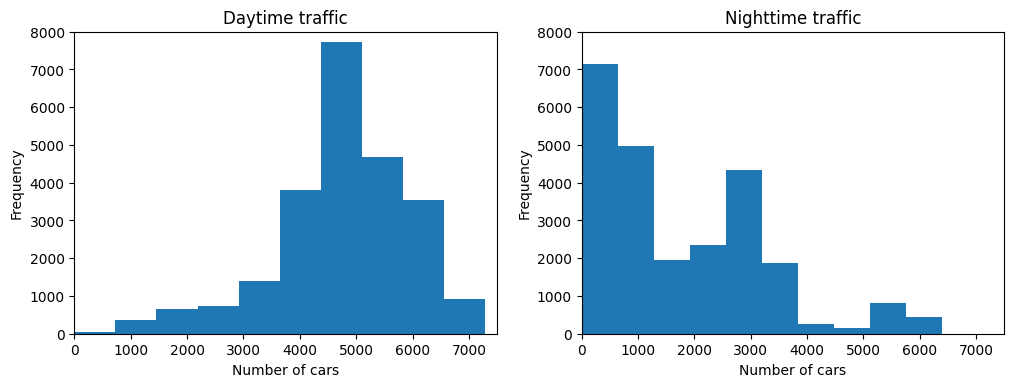

In [4]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.hist(day['traffic_volume'])
plt.title('Daytime traffic')
plt.xlabel('Number of cars')
plt.ylabel('Frequency')
plt.xlim(0,7500)
plt.ylim(0,8000)

plt.subplot(1,2,2)
plt.hist(night['traffic_volume'])
plt.title('Nighttime traffic')
plt.xlabel('Number of cars')
plt.ylabel('Frequency')
plt.xlim(0,7500)
plt.ylim(0,8000)

plt.show()

In [5]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [6]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The histogram that shows the distribution of traffic volume during the day is left skewed. This means that most of the traffic volume values are high — there are 4,252 or more cars passing the station each hour 75% of the time (because 25% of values are less than 4,252).

The histogram displaying the nighttime data is right skewed. This means that most of the traffic volume values are low — 75% of the time, the number of cars that passed the station each hour was less than 2,819.

# Time Indicators
Previously, we determined that the traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we decided to only focus on the daytime data moving forward.

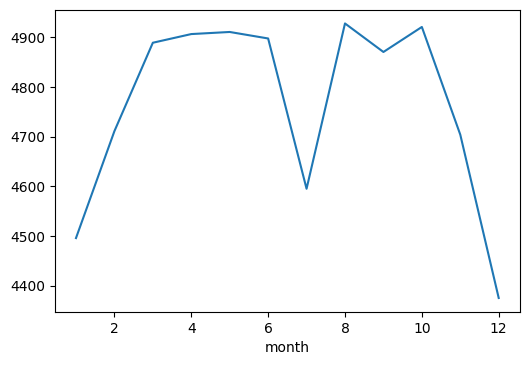

In [7]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume'].plot.line()
plt.show()

The traffic looks lighter during colder months and heavier during warmer months, except July.

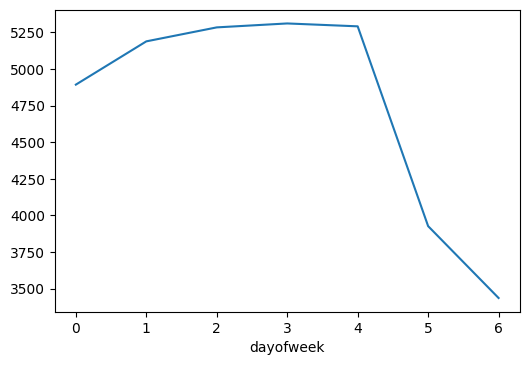

In [8]:
day['dayofweek']=day['date_time'].dt.dayofweek
by_dayofweek=day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'].plot.line()
plt.show()

The traffic is heavy during working days and signifficantly decreases during weekend.

In [9]:
day['hour']=day['date_time'].dt.hour
working_days=day.copy()[day['dayofweek']<=4]
weekend=day.copy()[day['dayofweek']>4]
by_hour_working=working_days.groupby('hour').mean()
by_hour_weekend=weekend.groupby('hour').mean()

print(by_hour_working['traffic_volume'])
print(by_hour_weekend['traffic_volume'])
print(by_hour_working.shape)

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64
(12, 7)


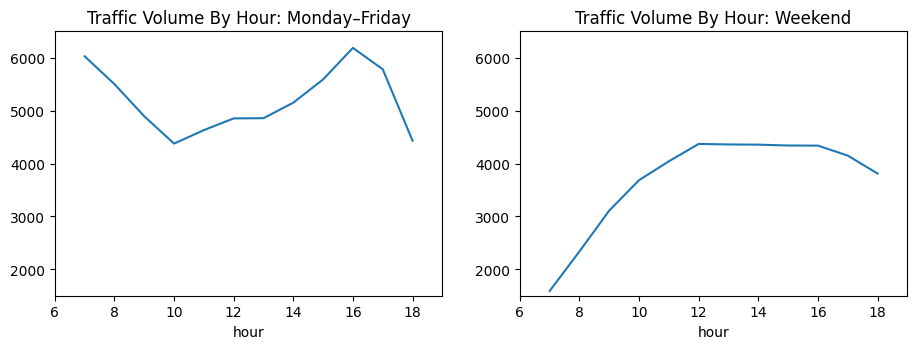

In [10]:
plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
by_hour_working['traffic_volume'].plot.line()
plt.xlim(6,19)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Monday–Friday')

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(6,19)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Weekend')

plt.show()

# Weather Indicators
Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.

A few of these columns are numerical, so let's start by looking up their correlation values with traffic_volume.

In [11]:
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

(240.0, 320.0)

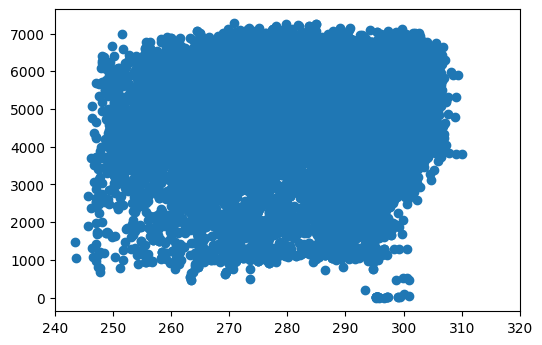

In [12]:
plt.scatter(day['temp'],day['traffic_volume'])
plt.xlim(240,320)

# Weather Types

In [13]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

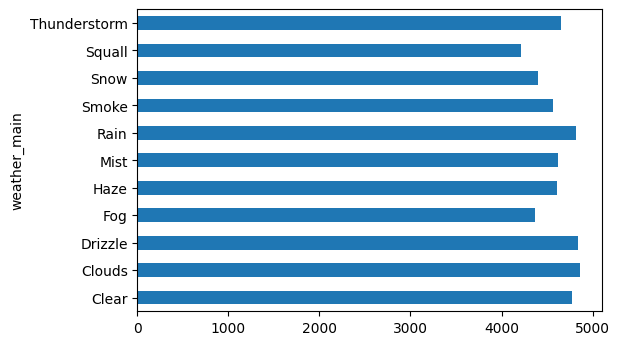

In [14]:
by_weather_main['traffic_volume'].plot.barh()
plt.show()

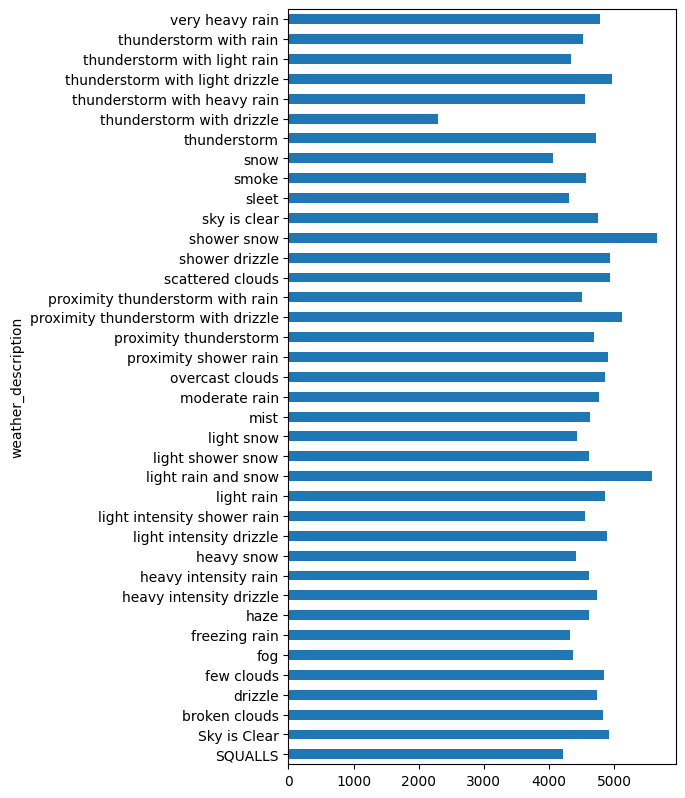

In [15]:
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.show()

# Conclusion
In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

Time indicators
The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
The traffic is usually heavier on business days compared to the weekends.
On business days, the rush hours are around 7 and 16.
Weather indicators
Shower snow
Light rain and snow
Proximity thunderstorm with drizzle